In [1]:
import numpy as np 
import pandas as pd 


In [2]:
trans = pd.DataFrame({"A":[12,4,5,None,1],
                    "B":[7,2,54,3,None],
                    "C":[20,16,11,3,8],
                    "D":[14,3,None,2,6]},
                    index=['Row_1','Row_2','Row_3','Row_4','Row_5'])
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [5]:
result = trans.transform(lambda x: x+10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [7]:
result1 = trans+10
result1

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [9]:
result2 = trans.transform([np.sqrt, np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                
                exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02

In [10]:
x = np.random.randint(10, 200, size=10)
x

array([124, 179, 183, 181,  84,  33, 149,  64,  71,  33])

In [11]:
np.digitize(x, bins=[50])

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [12]:
np.digitize(x, bins=[50, 100])

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 0], dtype=int32)

In [13]:
df = pd.DataFrame({"height":x})
df

,height
0,124
1,179
2,183
3,181
4,84
5,33
6,149
7,64
8,71
9,33


In [15]:
df['binned'] = pd.cut(x=df['height'], bins=[0,25,50,100,200])
df

,height,binned
0,124,"(100, 200]"
1,179,"(100, 200]"
2,183,"(100, 200]"
3,181,"(100, 200]"
4,84,"(50, 100]"
5,33,"(25, 50]"
6,149,"(100, 200]"
7,64,"(50, 100]"
8,71,"(50, 100]"
9,33,"(25, 50]"


In [16]:
df['bin_label']  = pd.cut(x = df['height'], bins=[0,25,50,100,200], labels=[1,2,3,4])
df

,height,binned,bin_label
0,124,"(100, 200]",4
1,179,"(100, 200]",4
2,183,"(100, 200]",4
3,181,"(100, 200]",4
4,84,"(50, 100]",3
5,33,"(25, 50]",2
6,149,"(100, 200]",4
7,64,"(50, 100]",3
8,71,"(50, 100]",3
9,33,"(25, 50]",2


In [17]:
pd.qcut(df['height'],  q=5)

0     (78.8, 134.0]
1    (134.0, 179.4]
2    (179.4, 183.0]
3    (179.4, 183.0]
4     (78.8, 134.0]
5    (32.999, 57.8]
6    (134.0, 179.4]
7      (57.8, 78.8]
8      (57.8, 78.8]
9    (32.999, 57.8]
Name: height, dtype: category
Categories (5, interval[float64]): [(32.999, 57.8] < (57.8, 78.8] < (78.8, 134.0] < (134.0, 179.4] < (179.4, 183.0]]

In [19]:
degrees = ['none','cum laude','magna cum laude','summa cum laude']
student_results = [3.93, 3.24,2.80,2.83, 3.91, 3.698, 3.731, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)
student_results

[3.93, 3.91, 3.82, 3.731, 3.698, 3.24, 3.24, 3.22, 2.83, 2.8]

In [22]:
student_results_degrees = pd.cut(student_results, [0,3.6,3.8,3.9,4.0], labels=degrees)


In [21]:
honor = pd.DataFrame({'grades':student_results, 'honors':student_results_degrees})
honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.240,none
6,3.240,none
7,3.220,none
8,2.830,none
9,2.800,none


In [30]:
%matplotlib inline 

In [24]:
#import matplotlib.pyplot as plt
#import matplotlib

<AxesSubplot:>

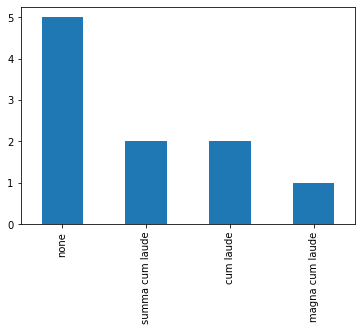

In [33]:
pd.value_counts(student_results_degrees).plot.bar()